# Deep Learning for Computer Vision:  Assignment 1


## Computer Science: COMS W 4995 006


### Due: February 13, 2018

#### Problem 1

You are asked to produce a minumum error rate classifier for a 3-class classification problem. Your feature space is 2-dimensional. Let's say the class conditional density functions (or likelihoods) are known and given by $\rho({\bf x}|y_i)$
where ${\bf x}$ is your feature and $y_i$ specifies the class. Let's also assume that the priors $P(y_i)$ are also given. (Both of these are specified below.) Show the decision regions for each of the three classes. Hint: you can show this by densely generating sample points ${\bf x}_j \in X$ in the feature space, classifying them, and then plotting and coloring them according to their predicted label.

Let the ccds and priors be given as:
    

$$\rho({\bf x}|y_1) \sim N({\bf \mu}_1, \Sigma_1)  \text{ and } P(y_1) = 0.5\,\, \text{ where } \,\, 
{\bf \mu}_1 = \left[\begin{array}{c} 1 \\ 1  \end{array} \right]
\,\, \text{ and } 
\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 0.5  \end{array} \right] $$


#### $$\rho({\bf x}|y_2) \sim N({\bf \mu}_2, \Sigma_2)  \text{ and } P(y_2) = 0.4\,\, \text{ where } \,\, 
{\bf \mu}_2 = \left[\begin{array}{c} 1 \\ 0  \end{array} \right]
\,\, \text{ and } 
\Sigma_2 = \left[\begin{array}{cc} 0.5 & 0 \\ 0 & 1  \end{array} \right] $$


$$\rho({\bf x}|y_3) \sim N({\bf \mu}_3, \Sigma_3)  \text{ and } P(y_3) = 0.1\,\, \text{ where } \,\, 
{\bf \mu}_3 = \left[\begin{array}{c} 0 \\ -1  \end{array} \right]
\,\, \text{ and } 
\Sigma_3 = \left[\begin{array}{cc} 2.0 & 0 \\ 0 & 0.5  \end{array} \right] $$

Remember all you need to do is to use Bayes theorem to get the expression for $P(y_i|{\bf x})$, then for each sample ${\bf x}_j \in X$ choose the $i$ with the highest aposteriori probability. Do not use any statisical packages to do this other than numpy.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

##### In this question I generate sample according to the two ways given by TA on slack:<br>
1)    Generate them using the given ccd and the prior. You may use Scipy to sample from discrete and Gaussian distributions. <br>
2)    Generate them using a random distribution and choose its range appropriately (you may want to look at the given ccds and the priors to get an idea). You cannot use SciPy if you use this approach. 


In [2]:
N_tot = 3000
N1 = int(0.5 * N_tot)
N2 = int(0.4 * N_tot)
N3 = int(0.1 * N_tot)
N = [N1, N2, N3]
p_y = np.array([0.5, 0.4, 0.1])
mu = np.array([[1,1], [1,0], [0,-1]])
cov = np.array([
            [[1,0],
             [0,0.5]],
            [[0.5, 0],
             [0,1]],
            [[2,0],
             [0,0.5]]])

In [3]:
def calculate_prob(X, mu, cov):
    X_mu = X - mu
    power = -1/2 * X_mu.dot(np.linalg.inv(cov)).dot(X_mu.T)
    exponent = np.diag(np.exp(power))
    return 1 / np.sqrt((2*np.pi)**2 * np.linalg.det(cov)) * exponent

In [4]:
def calculate_prediction():
    p = []
    for i in range(3):
        prob = calculate_prob(X, mu[i], cov[i])
        p.append(prob * p_y[i])    
    p_pred = np.column_stack(p)
    y_pred = np.argmax(p_pred, axis = 1)
    return y_pred

In [5]:
def generate_multivariate_sample():
    X_tmp = []
    X = []
    for i in range(3):
        x_tmp = np.random.multivariate_normal(mu[i], cov[i], N[i])
        X_tmp.append(x_tmp)
    X = np.row_stack(X_tmp)
    y = np.zeros(N_tot)
    y[0:N[0]] += 0
    y[N[0] : N[0] + N[1]] += 1
    y[N[0] + N[1] : N_tot] += 2
    return X,y

In [6]:
def plot_result(X, y_pred):
    X_pred1 = X[y_pred == 0]
    X_pred2 = X[y_pred == 1]
    X_pred3 = X[y_pred == 2]
    plt.figure(figsize=(12,8))
    plt.plot(X_pred1[:,0], X_pred1[:,1],'bo', label = 'class1')
    plt.plot(X_pred2[:,0], X_pred2[:,1],'ro', label = 'class2')
    plt.plot(X_pred3[:,0], X_pred3[:,1],'yo', label = 'class3')
    plt.xlabel('X_0')
    plt.ylabel('X_1')
    plt.legend(loc = 'upper right')
    plt.title("scatter plot for points")
    plt.show()

##### Method1: Use multivarivate sample generate by ccds and priors

In [7]:
X, y = generate_multivariate_sample()

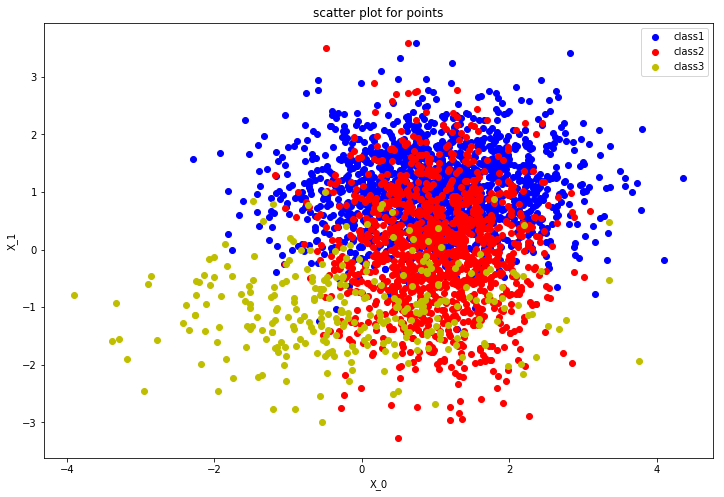

In [8]:
# plot randomly generated data
plot_result(X,y)

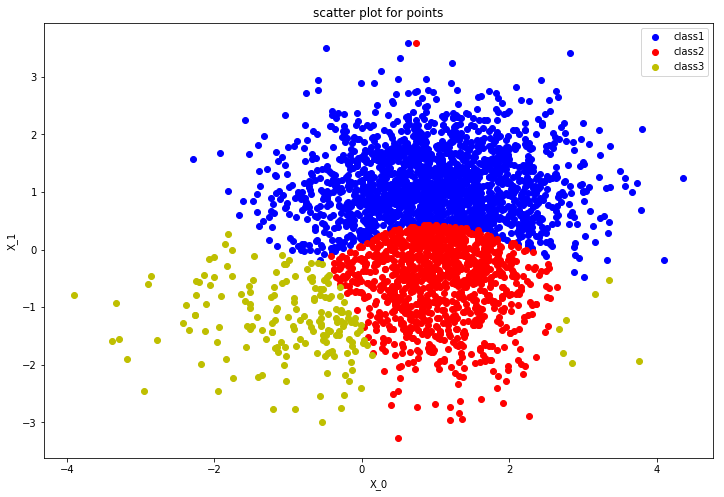

In [9]:
# result predicted by my classifier
y_pred = calculate_prediction()
plot_result(X,y_pred)

##### Mthod2: Use Uniform sample

In [10]:
def generate_uniform_sample():
    x1 = np.random.uniform(-60,60,10000)
    x2 = np.random.uniform(-60,60,10000)
    X = np.column_stack([x1, x2])
    return X

In [11]:
X = generate_uniform_sample()

/Users/yuwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


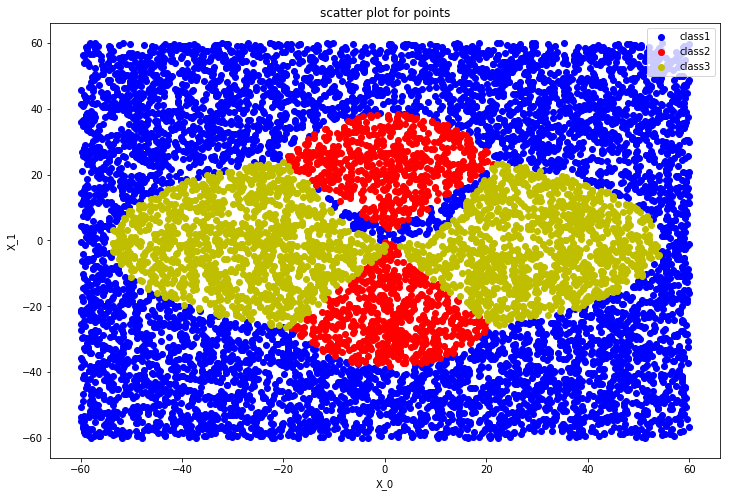

In [12]:
y_pred = calculate_prediction()
plot_result(X,y_pred)

Conlusion:<br>
 - We see that if we generate sample by given ccds and priors, there is little chance the sample would be on the margin. Which result in small range observation <br>
 - Then I try to generate sample by uniform distribution across range(-6, 6), then we can see how the classifier behaves in a wider range and the full pattern

#### Problem 2

Implement the Pegasos algorithm for finding a linear SVM classifier which separates the training data generated below. Experiment with three different choices for the regularization parameter and plot the resulting separating plane. Explain how the choice of C effects the resulting solution. Hint: the algorithm might show better convergence if you use the projection normalization step. Also, you can consult with any literature beyond the course notes, but you must write your own code.

In [62]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# Let's make up some random data to use to build our SVM classifier
data = pd.DataFrame(np.zeros((500, 3)), columns=['x1', 'x2', 'y'])

for i in range(len(data.index)):
    x1 = random.randint(20,100)
    if np.random.random() > 0.5:
        data.iloc[i,0] = 1.0 * x1 
        data.iloc[i,1] = 0.25 * x1 + 50.0 * (random.random() - 0.5) + 65.0
        data.iloc[i,2] = 1.0
    else:
        data.iloc[i,0] = 1.0 * x1
        data.iloc[i,1] = 0.24 * x1 + 50.0 * (random.random() - 0.5) + 0.0 
        data.iloc[i,2] = -1.0
    
# Add in a stray point
data.iloc[0,0] = 50.0
data.iloc[0,1] = 0.25 * x1 + 25.0
data.iloc[0,2] = 1.0

# Now let's normalize this data.

data.iloc[:,0] = (data.iloc[:,0] - data['x1'].mean()) / data['x1'].std()
data.iloc[:,1] = (data.iloc[:,1] - data['x2'].mean()) / data['x2'].std()

data.head()
data.describe()

,x1,x2,y
count,5.000000e+02,5.000000e+02,500.000000
mean,1.241229e-16,6.077361e-16,0.052000
std,1.000000e+00,1.000000e+00,0.999647
min,-1.698694e+00,-1.864510e+00,-1.000000
25%,-8.798596e-01,-8.966554e-01,-1.000000
50%,3.620112e-03,1.828441e-01,1.000000
75%,8.870998e-01,8.698527e-01,1.000000
max,1.749031e+00,1.710692e+00,1.000000


In [64]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.matrix(X.values)
y = np.matrix(y.values)

In [65]:
# Sloppy function for plotting our data
def plot_data(X, y):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    y_predict = y > 0
    indices_0 = [k for k in range(0, X.shape[0]) if not y_predict[k]]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k]]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='-1')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')
    
    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Training Data')
    plt.show()

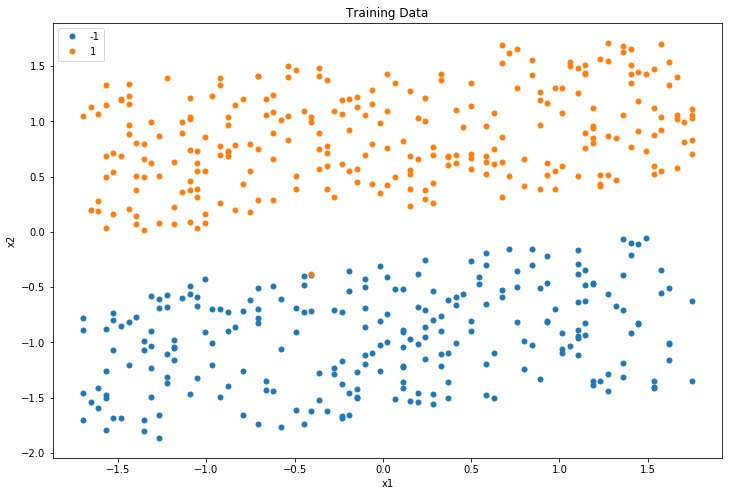

In [66]:
plot_data(X,y)

In [67]:
def update_W(W):
    for t in range(1, max_iter + 1):
        i_t = random.randint(0, N - 1)
        eta = 1 / (lambda_ * t)
        if y[i_t] * (X[i_t] * W.transpose()) < 1:
            W = W * (1 - eta * lambda_) + eta * y[i_t] * X[i_t]
        else:
            W = W * (1 - eta * lambda_)
        W = min(1, 1/(np.sqrt(lambda_) * np.linalg.norm(W))) * W
    return W

In [68]:
def plot_svm(X, y, W):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    y_predict = y > 0
    indices_0 = [k for k in range(0, X.shape[0]) if not y_predict[k]]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k]]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='-1')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')

    xx0 = np.linspace(-2,2,N)
    yy0 = -W[0,0] * xx0 / W[0,1]

    xx_1 = np.linspace(-2,2,N)
    yy_1 = (-1-W[0, 0] * xx_1) / W[0,1]

    xx1 = np.linspace(-2,2,N)
    yy1 = (1-W[0,0] * xx1) / W[0, 1]

    ax.plot(xx0, yy0, label = "Wx+b = 0")
    ax.plot(xx_1, yy_1, label = "Wx+b = -1")
    ax.plot(xx1, yy1, label = "Wx+b = 1")

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Training Data')
    plt.show()

##### C = 10

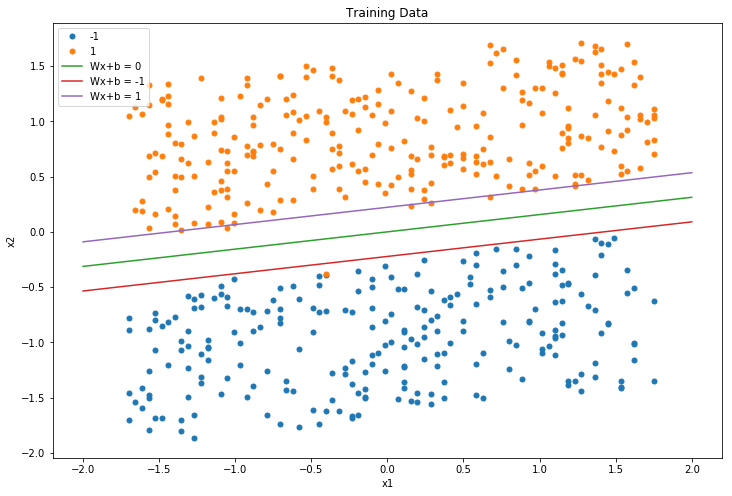

In [69]:
# C = 10
N = X.shape[0]
C = 10
max_iter = 100000
lambda_ = 2 / (N * C) 
W = np.mat(np.array([0, 0]))
W = update_W(W)
plot_svm(X, y, W)

##### C = 100

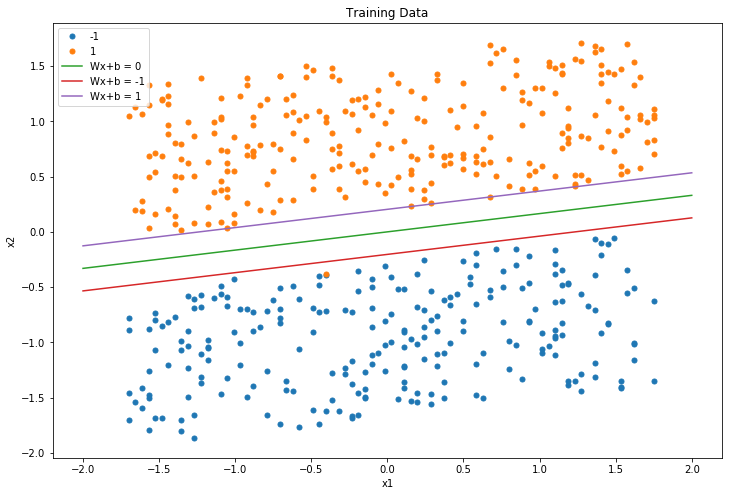

In [70]:
# C = 100
N = X.shape[0]
C = 100
max_iter = 100000
lambda_ = 2 / (N * C) 
W = np.mat(np.array([0, 0]))
W = update_W(W)
plot_svm(X, y, W)

##### C = 1000

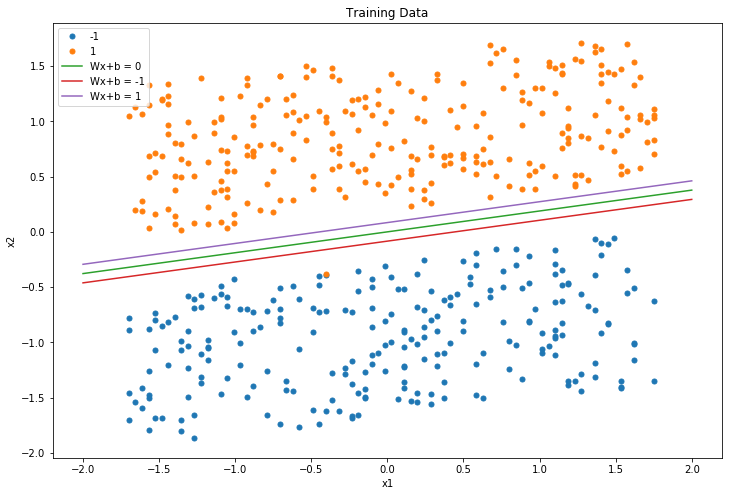

In [71]:
# C = 1000
N = X.shape[0]
C = 1000
max_iter = 100000
lambda_ = 2 / (N * C) 
W = np.mat(np.array([0, 0]))
W = update_W(W)
plot_svm(X, y, W)

##### Discussion

From the loss function $$minC(w) = ||w||^2 + C\sum_{i = 1}^{N}max(0, 1-y_{i}f(x_{i}))$$

We can see that as C increase, the lose function will incur more penality on the points between the two line ($wx + b = 1$ and $wx + b = -1$) in the term $\sum_{i = 1}^{N}max(0, 1-y_{i}f(x_{i}))$. As a result of it, When C is small (C = 10 in the first experiment), we can see there are points between the two line $wx + b = 1$ and $wx + b = -1$, it's allowable since such points only incur a small penalty (is less than 1 multiply C for points between two lines in figure C = 10). When the C increases, the margin shrinks and the classfier tries to makes a tighter margin since the points between the two line incurs more penality <br><br>
Note that the stray orange point(the one in the bottom of the line) is classifed wrongly by all of the three classifiers, there is because that to make it right, we have to move the bottom line down, which will result in more penality since some of the blue points will be between the margin and incur more penality. 

Another hyper-parameter is the max iterations, I use projection in the algorithm to make it converge faster and choose  max_iter = 100000